In [48]:
import pandas as pd

from ta import add_all_ta_features
from ta.utils import dropna

from ta.momentum import AwesomeOscillatorIndicator
from ta.momentum import ROCIndicator
from ta.momentum import StochRSIIndicator
from ta.momentum import StochasticOscillator

from ta.volume import AccDistIndexIndicator
from ta.volume import ForceIndexIndicator
from ta.volume import NegativeVolumeIndexIndicator

from ta.trend import EMAIndicator
from ta.trend import MACD
from ta.trend import SMAIndicator

from ta.volatility import BollingerBands

In [52]:
def TA_APPLICATION(data):
   
    # Load data
    data = pd.read_csv(data, sep="\t")
    data = data.rename(columns = {'<DATE>':'date','<OPEN>':'open', '<HIGH>':'high', '<LOW>':'low', '<CLOSE>':'close',
                                  '<TICKVOL>':'tickvol','<VOL>':'volume','<SPREAD>':'spread'})

    # Momentum Indicators
    indicator_AOI = AwesomeOscillatorIndicator(high=data['high'], low=data['low'], window1=5, window2=34, fillna=True)
    data['AOI'] = indicator_AOI.awesome_oscillator()

    indicator_ROC = ROCIndicator(close=data['close'], window=12, fillna=True)
    data['ROC'] = indicator_ROC.roc()

    indicator_StochRSI = StochRSIIndicator(close=data['close'], window=14, smooth1=3, smooth2=3, fillna=False)
    data['StochRSI'] = indicator_StochRSI.stochrsi()
    data['RSI %d'] = indicator_StochRSI.stochrsi_d()
    data['RSI %k'] = indicator_StochRSI.stochrsi_k()

    indicator_SO = StochasticOscillator(close=data['close'], high=data['high'], low=data['low'], window=14, smooth_window=3, fillna=True)
    data['StochOscillator'] = indicator_SO.stoch()
    data['Stoch_osc_signal'] = indicator_SO.stoch_signal()

    # Volume Indicators 
    indicator_ADI = AccDistIndexIndicator(high=data['high'], low=data['low'], close=data['close'], volume=data['volume'])
    data['ADI'] = indicator_ADI.acc_dist_index()

    indicator_FI = ForceIndexIndicator(close=data['close'], volume=data['volume'], window=20)
    data['FI'] = indicator_FI.force_index()

    indicator_NVI = NegativeVolumeIndexIndicator(close=data['close'], volume=data['volume'])
    data['NVI'] = indicator_NVI.negative_volume_index()

    # Volatility  Indicators
    indicator_bb = BollingerBands(close=data['close'], window=20, window_dev=2, fillna=True)

    data['bb_bbm'] = indicator_bb.bollinger_mavg()
    data['bb_bbh'] = indicator_bb.bollinger_hband()
    data['bb_bbl'] = indicator_bb.bollinger_lband()

    data['bb_bbhi'] = indicator_bb.bollinger_hband_indicator()
    data['bb_bbli'] = indicator_bb.bollinger_lband_indicator()

    # Trend Indicators
    indicator_EMA = EMAIndicator(close=data['close'], window=14, fillna=True)
    data['EMA'] = indicator_EMA.ema_indicator()

    indicator_MACD = MACD(close=data['close'], window_fast=12, window_slow=26, window_sign=9, fillna=True)
    data['MACD'] = indicator_MACD.macd()
    data['MACD_diff'] = indicator_MACD.macd_diff()
    data['MACD_signal'] = indicator_MACD.macd_signal()

    indicator_SMA = SMAIndicator(close=data['close'], window=26, fillna=True)
    data['SMA'] = indicator_SMA.sma_indicator()

    data['SMA1'] = data['close'].rolling(26).mean()

    return data


In [53]:
%time processed_data = TA_APPLICATION('./Historical_Data/Daily/EURUSD_Daily-Copy1.csv')
"""
CPU times: user 80.6 ms, sys: 3.91 ms, total: 84.5 ms
Wall time: 87.3 ms
"""
processed_data.info()

# Impute missing values in a variable with the variable's medial value
vars = processed_data.columns[1:]
for var in vars:
    processed_data[var] = np.where(data[var].isnull(), data[var].median(), processed_data[var])

CPU times: user 86.9 ms, sys: 3.12 ms, total: 90 ms
Wall time: 90.1 ms
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2076 entries, 0 to 2075
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              2076 non-null   object 
 1   open              2076 non-null   float64
 2   high              2076 non-null   float64
 3   low               2076 non-null   float64
 4   close             2076 non-null   float64
 5   tickvol           2076 non-null   int64  
 6   volume            2076 non-null   int64  
 7   spread            2076 non-null   int64  
 8   AOI               2076 non-null   float64
 9   ROC               2076 non-null   float64
 10  StochRSI          2050 non-null   float64
 11  RSI %d            2046 non-null   float64
 12  RSI %k            2048 non-null   float64
 13  StochOscillator   2076 non-null   float64
 14  Stoch_osc_signal  2076 non-null   float64
 15  ADI               

In [54]:
import numpy as np
import time

def mean_absolute_percentage_error(y_true, y_pred): 
    """
    Calculates MAPE between y_true and y_pred
    """
    mask_y = y_true!=0
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true[mask_y] - y_pred[mask_y]) / y_true[mask_y])) * 100

# Data Normalization
def normalize_function(data):
    max_num = np.amax(data, axis=0)
    min_num = np.amin(data, axis=0)
    normalized = []
    for num in data:
        normalized.append((num - min_num) / (max_num - min_num))
    return normalized

def timeit(func):
    """
    @timeit
    """
    def wrapper(*args, **kwargs):
        start = time.time()
        result = func(*args, **kwargs)
        end = time.time()
        print(f"Execution time of {func.__name__}: {end - start} seconds")
        return result
    return wrapper

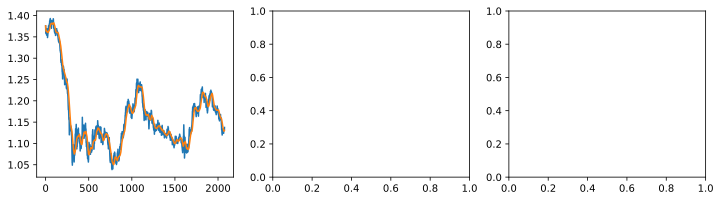

In [61]:
import matplotlib as mpl
mpl.use('MACOSX')
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format='svg'

fig, axes = plt.subplots(1, 3, figsize=(12, 3))

axes[0].plot(processed_data[['close','SMA']])
